In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
mouse_drug_clin_trial_merge_df = pd.merge(mouse_drug_data_df, clinical_trial_data_df, on="Mouse ID")

mouse_drug_clin_trial_merge_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [2]:
mouse_drug_clin_trial_merge_df.columns

Index(['Mouse ID', 'Drug', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites'],
      dtype='object')

In [3]:
mean_tumor_vol_grouped_drug_TP = mouse_drug_clin_trial_merge_df.groupby(["Drug", "Timepoint"])
mean_tumor_volume = mean_tumor_vol_grouped_drug_TP["Tumor Volume (mm3)"].mean()

# Convert to DataFrame

mean_tumor_vol_group_drug_TP_df = pd.DataFrame(mean_tumor_volume).reset_index()

# Preview DataFrame
mean_tumor_vol_group_drug_TP_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

sem_tumor_vol_grouped_drug_TP = mouse_drug_clin_trial_merge_df.groupby(["Drug", "Timepoint"])
sem_tumor_volume = sem_tumor_vol_grouped_drug_TP["Tumor Volume (mm3)"].sem()
sem_tumor_volume

# Convert to DataFrame

sem_tumor_vol_group_drug_TP_df = pd.DataFrame(sem_tumor_volume).reset_index()

# Preview DataFrame

sem_tumor_vol_group_drug_TP_df.head(15)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [5]:
#To select rows whose column value is in list
drugs = ['Capomulin', 'Ketapril', 'Infubinol', 'Placebo']
mouse_drug_clin_trial_merge_df_reduce = mouse_drug_clin_trial_merge_df[mouse_drug_clin_trial_merge_df.Drug.isin(drugs)]
mouse_drug_clin_trial_merge_df_reduce

# Display the data table for preview
#mouse_drug_clin_trial_merge_df.sort_values("Timepoint").head()

#mouse_drug_clin_trial_merge_df.sort_values("Timepoint").head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [6]:
#Select drugs

drugs_to_plot = []

for row in mouse_drug_clin_trial_merge_df_reduce.itertuples(name="Drug"):
    drugs_list = [row.Drug]
    drugs_to_plot.append(drugs_list)
    
flattened_drug_list  = [val for sublist in drugs_to_plot for val in sublist]
#flattened_drug_list


In [7]:
#def unique(flattened_drug_list): 
      
     # intilize a null list 
unique_list = [] 
      
    # traverse for all elements 
for x in flattened_drug_list: 
        # check if exists in unique_list or not 
    if x not in unique_list: 
        unique_list.append(x) 

unique_list

['Ketapril', 'Capomulin', 'Infubinol', 'Placebo']

In [8]:
selected_drugs = ['Capomulin','Infubinol', 'Ketapril','Placebo']
colors = ['red','blue','green','black']
formats = ['o','^','s','D']

test = selected_drugs[0]
test

'Capomulin'

In [9]:
selected_drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

mean_tumor_vol_group_drug_TP_df.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_count_grouped_drug_TP = mouse_drug_clin_trial_merge_df_reduce.groupby(["Drug", "Timepoint"])
mouse_count = mouse_count_grouped_drug_TP["Mouse ID"].count()
#mouse_count.rename(columns = {'Mouse ID':'Mouse count'}, inplace = True)
mouse_count

# Convert to DataFrame

mouse_count_df = pd.DataFrame(mouse_count).reset_index()
mouse_count_df.rename(columns={'Mouse ID': 'Mouse Count'}, inplace=True)

# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# calculations for percentage survival
mouse_total_start = mouse_count_df[mouse_count_df['Timepoint'] == 0]
mouse_total_start 

mouse_count_df_pivot = mouse_count_df.pivot_table(index='Timepoint', columns='Drug')
mouse_count_survival = mouse_count_df_pivot['Mouse Count']



for drug in unique_list:
    mouse_count_survival[drug +'%']=''
    total_mouse_start = mouse_count_survival.loc[0,drug]
    
    for index, row in mouse_count_survival.iterrows():
        survival_rate = (row[drug]/total_mouse_start)*100
        mouse_count_survival.loc[index, [drug +'%']] = survival_rate

mouse_count_survival    
    


#condition = True
#i = 0
#while True:
 #   i += 5
  #  timepoint_df = mouse_count_df[mouse_count_df['Timepoint'] == i]
   # if len(timepoint_df) == 0:
    #    break
    #mouse_total_start['Mouse Count'].tolist() - timepoint_df['Mouse Count']
    

#percent_survival = mouse_count_df['Mouse Count'] / mouse_total_start
#percent_survival

Drug,Capomulin,Infubinol,Ketapril,Placebo,Ketapril%,Capomulin%,Infubinol%,Placebo%
Timepoint,,,,,,,,
0,25,25,25,25,100,100,100,100
5,25,25,23,24,92,100,100,96
10,25,21,22,24,88,100,84,96
15,24,21,19,20,76,96,84,80
20,23,20,19,19,76,92,80,76
25,22,18,19,17,76,88,72,68
30,22,17,18,15,72,88,68,60
35,22,12,17,14,68,88,48,56
40,21,10,15,12,60,84,40,48


In [12]:

reduced_survival_drugs = mouse_count_survival.drop(columns=['Capomulin', 'Ketapril', 'Infubinol', 'Placebo'])

survival_drug_list = list(reduced_survival_drugs.columns.values)
survival_drug_list

['Ketapril%', 'Capomulin%', 'Infubinol%', 'Placebo%']

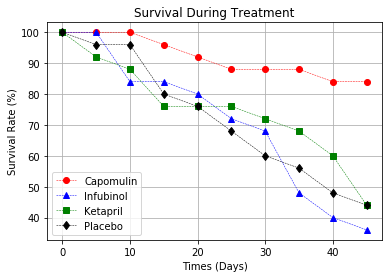

In [28]:
# Generate the Plot (Accounting for percentages)
drug_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]

for drug,marker,colors in drug_format_list:
    total_mouse = mouse_count_survival[drug][0]
    survival_rate = (mouse_count_survival[drug]/total_mouse)*100
    survival_treatment_plt = plt.plot(mouse_count_survival.index,survival_rate,
                                      marker=marker,ls='--',label=drug,
                                      color=colors,linewidth=0.5)

# Show the Figure
plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()
# Save the Figure

# Show the Figure
plt.show()